# pollens (value 0 to 5)

ALDER
ASH
BIRCH
COTTONWOOD
ELM
MAPLE
OLIVE
JUNIPER
OAK
PINE
CYPRESS_PINE
HAZEL
GRAMINALES
JAPANESE_CEDAR
JAPANESE_CYPRESS
RAGWEED
MUGWORT

# medications (value 0 to 10)
Azelastine (Astepro)
Ketotifen (Alaway, Zaditor)
Olopatadine (Pataday)
Cetirizine (Zyrtec Allergy)
Loratadine (Alavert, Claritin)
Fexofenadine (Allegra Allergy)
Desloratadine (Clarinex)
Mometasone (Nasonex)
Fluticasone propionate (Flonase Allergy Relief)
Ciclesonide (Zetonna)
Loteprednol (Alrex, Lotemax)
Prednisolone (Omnipred, Pred Forte, others)
Prednisolone (Prelone)
Methylprednisolone (Medrol)

# symptoms (value 1 to 3)
Congestion
Watery Eyes
Itchy Eyes
Sinus Pressure
Sneezing

In [1]:
import pandas as pd
import numpy as np

# Define the possible values
pollens = ["ALDER", "ASH", "BIRCH", "COTTONWOOD", "ELM", "MAPLE", "OLIVE", "JUNIPER", "OAK", "PINE", "CYPRESS_PINE", "HAZEL", "GRAMINALES", "JAPANESE_CEDAR", "JAPANESE_CYPRESS", "RAGWEED", "MUGWORT"]
medications = ["Azelastine", "Ketotifen", "Olopatadine", "Cetirizine", "Loratadine", "Fexofenadine", "Desloratadine", "Mometasone", "Fluticasone", "Ciclesonide", "Loteprednol", "Prednisolone_1", "Prednisolone_2", "Methylprednisolone"]
symptoms = ["Congestion", "Watery Eyes", "Itchy Eyes", "Sinus Pressure", "Sneezing"]

# Number of samples
num_samples = 5000

# Generate synthetic data
data = []
for _ in range(num_samples):
    # Random pollen levels with some correlations
    pollen_levels = {p: np.random.randint(0, 6) for p in pollens}
    
    # Simulate symptom severity based on pollen levels (pre-medication)
    symptom_values_pre_medication = {
        "Congestion": int(np.clip(np.random.normal(sum([pollen_levels[p] for p in ["OAK", "PINE", "JUNIPER", "GRAMINALES"]]) / 2, 1), 1, 3)),
        "Watery Eyes": int(np.clip(np.random.normal(sum([pollen_levels[p] for p in ["BIRCH", "RAGWEED", "JAPANESE_CEDAR"]]) / 2, 1), 1, 3)),
        "Itchy Eyes": int(np.clip(np.random.normal(sum([pollen_levels[p] for p in ["BIRCH", "ASH", "ELM"]]) / 2, 1), 1, 3)),
        "Sinus Pressure": int(np.clip(np.random.normal(sum([pollen_levels[p] for p in ["MAPLE", "HAZEL", "MUGWORT"]]) / 2, 1), 1, 3)),
        "Sneezing": int(np.clip(np.random.normal(sum([pollen_levels[p] for p in ["RAGWEED", "GRAMINALES", "COTTONWOOD"]]) / 2, 1), 1, 3))
    }
    
    # Random medication usage with some correlations
    medication_levels = {m: np.random.randint(0, 11) for m in medications}
    
    # Store data
    row = {**pollen_levels, **medication_levels, **symptom_values_pre_medication}
    data.append(row)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("synthetic_allergy_data.csv", index=False)

print(df.head())


   ALDER  ASH  BIRCH  COTTONWOOD  ELM  MAPLE  OLIVE  JUNIPER  OAK  PINE  ...  \
0      1    2      1           5    3      1      1        4    2     1  ...   
1      4    1      1           3    3      1      1        5    1     0  ...   
2      1    3      4           0    4      5      4        4    2     4  ...   
3      1    0      4           3    1      4      3        4    0     3  ...   
4      2    2      0           1    5      3      2        1    3     3  ...   

   Ciclesonide  Loteprednol  Prednisolone_1  Prednisolone_2  \
0            2           10               8               5   
1            0            8              10               2   
2           10            7               0               2   
3            5            1               9               8   
4           10            2               8               4   

   Methylprednisolone  Congestion  Watery Eyes  Itchy Eyes  Sinus Pressure  \
0                   7           3            2           3    

2025-01-29 19:17:07.927601: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-29 19:17:07.928293: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-29 19:17:07.931943: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-29 19:17:07.939973: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738174627.953429   60329 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738174627.95

Epoch 1/50


/home/victoria/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-29 19:17:09.975608: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.3991 - mae: 3.7856 - val_loss: 8.5317 - val_mae: 2.3094
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2229 - mae: 2.2674 - val_loss: 7.9418 - val_mae: 2.2336
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8670 - mae: 2.2180 - val_loss: 7.8570 - val_mae: 2.2192
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8002 - mae: 2.2079 - val_loss: 7.8000 - val_mae: 2.2102
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7183 - mae: 2.1927 - val_loss: 7.7690 - val_mae: 2.1980
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6743 - mae: 2.1820 - val_loss: 7.7381 - val_mae: 2.1965
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5983 - mae: 2.1701 - val_loss: 7.7104 - val_mae: 2.1929
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5702 - mae: 2.1668 - val_loss: 7.6981 - val_mae: 2.1862
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5687

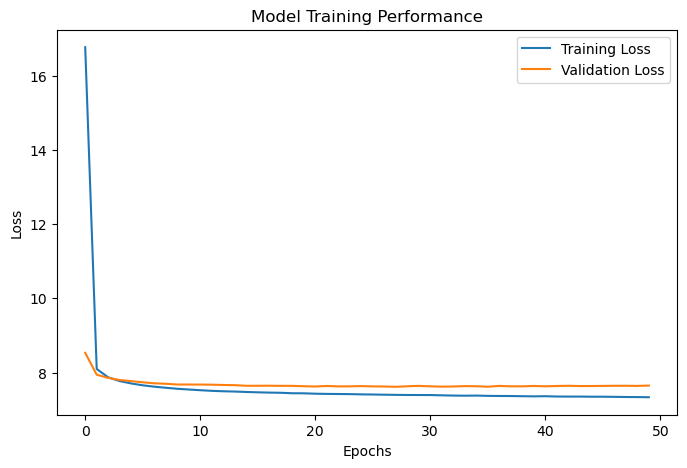

failed to lookup keras version from the file,
    this is likely a weight only file


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflowjs as tfjs
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("synthetic_allergy_data.csv")

# Define input features (pollens) and targets (symptoms & medications)
pollen_features = ["ALDER", "ASH", "BIRCH", "COTTONWOOD", "ELM", "MAPLE", "OLIVE", "JUNIPER", "OAK", "PINE", "CYPRESS_PINE", "HAZEL", "GRAMINALES", "JAPANESE_CEDAR", "JAPANESE_CYPRESS", "RAGWEED", "MUGWORT"]
symptom_targets = ["Congestion", "Watery Eyes", "Itchy Eyes", "Sinus Pressure", "Sneezing"]
medication_targets = ["Azelastine", "Ketotifen", "Olopatadine", "Cetirizine", "Loratadine", "Fexofenadine", "Desloratadine", "Mometasone", "Fluticasone", "Ciclesonide", "Loteprednol", "Prednisolone_1", "Prednisolone_2", "Methylprednisolone"]

# Select features and targets
X = df[pollen_features].values
y_symptoms = df[symptom_targets].values
y_medications = df[medication_targets].values

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_symptoms_train, y_symptoms_test, y_medications_train, y_medications_test = train_test_split(
    X_scaled, y_symptoms, y_medications, test_size=0.2, random_state=42
)

# Define a simple neural network model
input_shape = X_train.shape[1]

model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(input_shape,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(symptom_targets) + len(medication_targets), activation="linear")  # Outputs for symptoms & medications
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model and store history
history = model.fit(
    X_train, np.hstack((y_symptoms_train, y_medications_train)),
    epochs=50, batch_size=32,
    validation_data=(X_test, np.hstack((y_symptoms_test, y_medications_test)))
)

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

# Save the model for TensorFlow.js
tfjs.converters.save_keras_model(model, "tfjs_model")
